<a href="https://colab.research.google.com/github/veranoviani/Tugas-Causal-Analysis-I-II/blob/main/Assignment_Day_14_Vera_Noviani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAUSAL ANALYSIS I & II - BASIC



# No 1


Karena matching biasanya digunakan untuk menyeimbangkan atau menyamakan kelompok subjek penelitian. Dengan metode ini kelompok treatment dipasangkan dengan kelompok non-treatment berdasarkan kovariat yang diamati. Metode ini digunakan untuk mengurangi bias dalam estimasi efek perlakuan pada data yang bersifat observasi karena adanya faktor confounding. Di tambah menurut Yanovitzky, Zanutto, & Hornik (2005) proses matching dapat mengurangi kelompok control yang tidak memiliki pasangan, sehingga ada beberapa data yang bahkan tidak digunakan sama sekali karena tidak memilliki nilai yang cocok dengan data pada kelompok control.

# No 2

Dalam penggunaan Double Selection kita tidak bisa mengetahui variabel yang terseleksi tersebut adalah variabel eksogen atau variabel yang berhubungan dengan variabel lainnya. Selain itu dalam penggunaan double selection jika data berdimensi tinggi akan terjadi bias dalam hasil pengukuran treatment. Sementara dalam penggunaan Double Machine Learning permasalahan seperti data berdimensi tinggi dapat teratasi karena kekuatan prediksi dari machine learning yang mampu mempelajari pola pada data dan dapat mencegah terjadinya bias bahkan ketika terdapat cofounder yang tidak dapat terukur

sumber : (http://qed.econ.queensu.ca/pub/faculty/mackinnon/econ882/slides/econ882-slides-20h.pdf)

# No 3

Pengunaan ATE (Average Treatment Effect) digunakan saat kondisi treatment pada dua kelompok saling independent. Memenuhi asumsi SUTVA (Stable Unit Treatment Value Assumption) atau ketika satu kelompok diberi treatment maka hasilnya tidak beda jauh pada satu kelompok tersebut. Serta hanya terdapat 1 jenis treatment dan digunakan untuk tingkat sub-group
 

Penggunaan CATE (Conditional Average Treatment Effet) digunakan ketika SUTVA tidak terpenuhi dan terdapat perbedaan hasil treatment pada 1 group serta digunakan untuk tingkat sub dalam sub-gorup.


Penggunaan LATE (Local Average Treatment Effect) digunakan untuk mengukur effect treatment pada level individu dalam group
sumber selan itu terdapat asumsi treatment homogen ketika instrumental variable begitu lemah

# No 4

Menurut saya metode yang lebih baik untuk menjelaskan dampak dari akibat adalah interpretable machine learning. Metode interpretable machine learning dapat digunakan untuk analisis kausal ketika ingin menjelaskan counterfactual model.

sumber : (https://christophm.github.io/interpretable-ml-book/interpretability-importance.html)

# CAUSAL ANALYSIS I & II - ADVANCED

In [2]:
!pip install econml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.3 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 564 kB 48.9 MB/s 
     |████████████████████████████████| 164 kB 43.5 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [3]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df= pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")

In [5]:
df.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


In [7]:
# outcome
Y = "school_achievement"
# treatment
T = "intervention"
# covariates
X = ["school_urbanicity", "school_mindset", "success_expect" , "school_ethnic_minority" , "school_poverty" , "school_size" , "frst_in_family" ]

In [8]:
df[Y]

0        0.648586
1        0.648586
2        0.648586
3        0.648586
4        0.648586
           ...   
10386   -1.129889
10387   -1.129889
10388   -1.129889
10389   -1.129889
10390   -1.129889
Name: school_achievement, Length: 10391, dtype: float64

In [9]:
df[T]

0        1
1        1
2        1
3        1
4        1
        ..
10386    0
10387    0
10388    0
10389    0
10390    0
Name: intervention, Length: 10391, dtype: int64

In [10]:
df[X]

,school_urbanicity,school_mindset,success_expect,school_ethnic_minority,school_poverty,school_size,frst_in_family
0,4,0.334544,6,-1.310927,0.224077,-0.426757,1
1,4,0.334544,4,-1.310927,0.224077,-0.426757,1
2,4,0.334544,6,-1.310927,0.224077,-0.426757,0
3,4,0.334544,6,-1.310927,0.224077,-0.426757,0
4,4,0.334544,6,-1.310927,0.224077,-0.426757,0
...,...,...,...,...,...,...,...
10386,3,1.185986,7,1.009875,1.005063,-1.174702,1
10387,3,1.185986,7,1.009875,1.005063,-1.174702,1
10388,3,1.185986,2,1.009875,1.005063,-1.174702,1
10389,3,1.185986,5,1.009875,1.005063,-1.174702,1


In [11]:
# define DML Object
dml_est = DML(
    model_y = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_t = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_final = LinearRegression(fit_intercept=False),
    random_state = 1000
)

In [12]:
# fit estimator to train data
np.random.seed(1000)
dml_est.fit(df[Y], T = df[T], X = df[X], inference="bootstrap")

In [13]:
dml_est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
school_urbanicity,0.001,0.001,0.637,0.18,-0.001,0.003
school_mindset,0.001,0.002,0.7,0.09,-0.001,0.005
success_expect,-0.0,0.002,-0.119,0.38,-0.004,0.003
school_ethnic_minority,0.0,0.001,0.159,0.36,-0.002,0.003
school_poverty,-0.002,0.002,-0.99,0.05,-0.006,0.001
school_size,0.002,0.002,1.133,0.05,-0.0,0.006
frst_in_family,-0.002,0.004,-0.379,0.3,-0.009,0.007
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,-0.001,0.009,-0.141,0.41,-0.019,0.02


In [14]:
# Get treatment effect and its confidence interval
te_pred = dml_est.effect(df[X])

In [15]:
# Measure price effect
np.mean(te_pred)

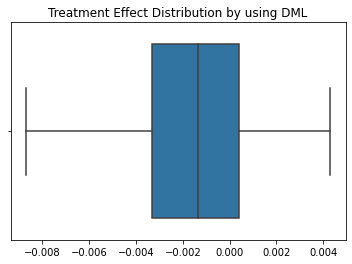

In [16]:
# check treatment effect distribution
sns.boxplot(x = te_pred).set_title("Treatment Effect Distribution by using DML");

# Summary 

Dari pernyataan "Bahwa mengajarkan growth mindset pada mereka akan meningkatkan prestasi akademis. Dua grup dibentuk dimana satu grup diberikan seminar tentang growth mindset sedangkan yang lainnya tidak. Selanjutnya akan diukur bagaimana prestasi mereka secara akademik". Dengan variable-variable yang telah di berikan dan telah dilakukan penelitian eksperimen acak yang dilakukan ke siswa SMA di seluruh Amerika Serikat untuk membuktikan hal tersebut. 

Maka dari data yang di berikan tersebut bisa di tarik kesimpulan bahwa variable yang menjadi outcome ialah "School Achievement" . Sementara yang menjadi covarience adalah hal-hal yang mempengaruhi school achievement seperti:

- school urbanicity
- school_mindset
- success expect
- school ethnic minority
- school poverty
- school size
- frst in family

Dan yang menjadi variable yang akan di treatment adalah "Intervention"

Model kali ini yang digunakan ialah Double Machine Learning untuk melihat model treatment yang digunakan akan berkelanjutan atau tidak.

Dan hasil yang didapat bahwa pengaruh school mindset dan school size memiliki dampat yang signifikan positif terhadap school achievement. Sementara school poverty memiliki dampak yang signifikan negatif terhadap school achievement

Sementara variabel lainnya memiliki dampak tidak signifikan terhadap school achivement.


